## Experement Presentation by Team_A

In [1]:
import torch
torch.cuda.is_available()

False

In [4]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.0502, 0.7762, 0.6674],
        [0.4309, 0.4669, 0.2233],
        [0.6896, 0.4459, 0.0869],
        [0.1446, 0.0406, 0.7019],
        [0.8416, 0.0777, 0.4046]])


## Objectives

- surmarize a normal passage a combination of extractive and abstractive techniques then after apply it on googles T5 text summarizer

- adjust text leanght and observe the outcomes

- apply the above  on a data frame

- demonstrate a question and answer Model

- Apply the question and answer model on a data frame

### 1  Setting up necessary libraries

In [19]:
import numpy as np
from scipy import stats
import pandas as pd

#models
from allennlp.predictors.predictor import Predictor
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from summarizer import Summarizer
predictor = Predictor.from_path("C:/Users/Silas_Dell/Downloads/Compressed/bidaf-elmo.2021-02-11.tar_2.gz")


from allennlp.predictors import Predictor
from allennlp_models.pretrained import load_predictor

# Suppressing unnwarranted warnings
import warnings
warnings.filterwarnings("ignore")

error loading _jsonnet (this is expected on Windows), treating C:\Users\SILAS_~1\AppData\Local\Temp\tmpiwrlyvl7\config.json as plain json


In [2]:
# Load Model and Tokenizer
model = AutoModelForSeq2SeqLM.from_pretrained('t5-base')
tokenizer = AutoTokenizer.from_pretrained('t5-base')

### Input Text



In [40]:
text = """
New York (CNN Business)Netflix is synonymous with streaming, but its competitors have a distinct advantage that threatens the streaming leader's position at the top.
Disney has Disney+, but it also has theme parks, plush Baby Yoda dolls, blockbuster Marvel movies and ESPN. Comcast (CMCSA), Amazon (AMZN), ViacomCBS (VIACA), CNN's parent company WarnerMedia and Apple (AAPL) all have their own streaming services, too, but they also have other forms of revenue.
As for Netflix (NFLX), its revenue driver is based entirely on building its subscriber base. It's worked out well for the company - so far. But it's starting to look like the king of streaming will soon need something other than new subscribers to keep growing.
The streaming service reported Tuesday it now has 208 million subscribers globally, after adding 4 million subscribers in the first quarter of 2021. But that number missed expectations and the forecasts for its next quarter were also pretty weak.
That was a big whiff for Netflix - a company coming off a massive year of growth thanks in large part to the pandemic driving people indoors - and Wall Street's reaction has not been great.
The company's stock dropped as much as 8% on Wednesday, leading some to wonder what the future of the streamer looks like if competition continues to gain strength, people start heading outdoors and if, most importantly, its growth slows.
"If you hit a wall with [subscriptions] then you pretty much don't have a super growth strategy anymore in your most developed markets," Michael Nathanson, a media analyst and founding partner at MoffettNathanson, told CNN Business. "What can they do to take even more revenue out of the market, above and beyond streaming revenues?"
Or put another way, the company's lackluster user growth last quarter is a signal that it wouldn't hurt if Netflix - a company that's lived and died with its subscriber numbers - started thinking about other ways to make money.
An ad-supported Netflix? Not so fast
There are ways for Netflix to make money other than raising prices or adding subscribers. The most obvious: selling advertising.
Netflix could have 30-second commercials on their programming or get sponsors for their biggest series and films. TV has worked that way forever, why not Netflix?
That's probably not going to happen, given that CEO Reed Hastings has been vocal about the unlikelihood of an ad-supported Netflix service. His reasoning: It doesn't make business sense.
"It's a judgment call... It's a belief we can build a better business, a more valuable business [without advertising]," Hastings told Variety in September. "You know, advertising looks easy until you get in it. Then you realize you have to rip that revenue away from other places because the total ad market isn't growing, and in fact right now it's shrinking. It's hand-to-hand combat to get people to spend less on, you know, ABC and to spend more on Netflix."
Hastings added that "there's much more growth in the consumer market than there is in advertising, which is pretty flat."
He's also expressed doubts about Netflix getting into live sports or news, which could boost the service's allure to subscribers, so that's likely out, too, at least for now.
So if Netflix is looking for other forms of near-term revenue to help support its hefty content budget ($17 billion in 2021 alone) then what can it do? There is one place that could be a revenue driver for Netflix, but if you're borrowing your mother's account you won't like it.
Netflix could crack down on password sharing - a move that the company has been considering lately.
"Basically you're going to clean up some subscribers that are free riders," Nathanson said. "That's going to help them get to a higher level of penetration, definitely, but not in long-term."
Lackluster growth is still growth
Missing projections is never good, but it's hardly the end of the world for Netflix. The company remains the market leader and most competitors are still far from taking the company on. And while Netflix's first-quarter subscriber growth wasn't great, and its forecasts for the next quarter alarmed investors, it was just one quarter.
Netflix has had subscriber misses before and it's still the most dominant name in all of streaming, and even lackluster growth is still growth. It's not as if people are canceling Netflix in droves.
Asked about Netflix's "second act" during the company's post-earnings call on Tuesday, Hastings again placed the company's focus on pleasing subscribers.
"We do want to expand. We used to do that thing shipping DVDs, and luckily we didn't get stuck with that. We didn't define that as the main thing. We define entertainment as the main thing," Hastings said.
He added that he doesn't think Netflix will have a second act in the way Amazon has had with Amazon shopping and Amazon Web Services. Rather, Netflix will continue to improve and grow on what it already does best.
"I'll bet we end with one hopefully gigantic, hopefully defensible profit pool, and continue to improve the service for our members," he said. "I wouldn't look for any large secondary pool of profits. There will be a bunch of supporting pools, like consumer products, that can be both profitable and can support the title brands.
"""

## Tokenize Text

In [41]:
tokens_input = tokenizer.encode("summarize: "+text, return_tensors='pt', 
                                max_length=tokenizer.model_max_length, 
                                truncation=True)

In [42]:
summary_ids = model.generate(tokens_input, min_length=80,
                             max_length=150,
                             length_penalty=20, 
                             num_beams=2)

summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [43]:
print(summary)

Netflix (NFLX) reported Tuesday it now has 208 million subscribers globally. that number missed expectations and the forecasts for its next quarter were also pretty weak. the streaming service's stock dropped as much as 8% on Wednesday, leading some to wonder what the future of the streamer looks like. if competition continues to gain strength, people start heading outdoors and if, most importantly, its growth slows, it wouldn't hurt if Netflix started thinking about other ways to make money - like selling ads.


In [44]:
# number of tokens generated from the text using T5 Tokenizer
len(tokenizer(text)['input_ids'])

Token indices sequence length is longer than the specified maximum sequence length for this model (1237 > 512). Running this sequence through the model will result in indexing errors


1237

Using BERT summarizer to extract only top 50% of sentences that are considered important.

In [3]:
bert_model = Summarizer()
ext_summary = bert_model(text, ratio=0.5)

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


NameError: name 'text' is not defined

In [46]:
print(ext_summary)

New York (CNN Business)Netflix is synonymous with streaming, but its competitors have a distinct advantage that threatens the streaming leader's position at the top. Disney has Disney+, but it also has theme parks, plush Baby Yoda dolls, blockbuster Marvel movies and ESPN. It's worked out well for the company - so far. Or put another way, the company's lackluster user growth last quarter is a signal that it wouldn't hurt if Netflix - a company that's lived and died with its subscriber numbers - started thinking about other ways to make money. Not so fast
There are ways for Netflix to make money other than raising prices or adding subscribers. Netflix could have 30-second commercials on their programming or get sponsors for their biggest series and films. His reasoning: It doesn't make business sense. You know, advertising looks easy until you get in it. Then you realize you have to rip that revenue away from other places because the total ad market isn't growing, and in fact right now 

## Tokenize BERT Summary

In [47]:
tokens_input_2 = tokenizer.encode("summarize: "+ext_summary, return_tensors='pt', 
                                max_length=tokenizer.model_max_length, 
                                truncation=True)

In [48]:
len(tokenizer(ext_summary)['input_ids'])

522

## Extractive-Abstractive Summary

In [49]:
summary_ids_2 = model.generate(tokens_input_2, min_length=80,
                             max_length=150,
                             length_penalty=20, 
                             num_beams=2)

summary_2 = tokenizer.decode(summary_ids_2[0], skip_special_tokens=True)

In [50]:
print(summary_2)


Netflix's lackluster user growth last quarter is a signal that it wouldn't hurt if it started thinking about other ways to make money. the company could crack down on password sharing - a move that the company has been considering lately. "i wouldn't look for any large secondary pool of profits," says Hastings. he says he doesn't think Netflix will have a second act in the way Amazon has had with Amazon shopping and Amazon Web Services.


In [51]:
text1 = """
AMONG the numerous mechanisms that make human life possible is the body’s ability to heal wounds and regenerate damaged tissue. The process begins as soon as an injury occurs.
Consider: The healing process is made possible by a cascade of complex cellular functions:
Platelets adhere to tissues around a wound, forming a blood clot and sealing damaged blood vessels.
Inflammation protects against infection and removes any “debris” caused by the injury.
Within days, the body begins to replace injured tissue, make the wound contract, and repair damaged blood vessels.
Finally, scar tissue remodels and strengthens the damaged area.
Inspired by blood clotting, researchers are developing plastics that can “heal” 
damage to themselves. Such regenerating materials are equipped with tiny parallel 
tubes containing two chemicals that “bleed” when any damage occurs. As the two 
chemicals mix, they form a gel that spreads across the damaged areas, closing 
cracks and holes. As the gel solidifies, it forms a tough substance that restores 
the material’s original strength. One researcher admits that this synthetic healing process currently under development is “reminiscent” of what already exists in nature.
"""

In [52]:
tokens_input = tokenizer.encode("summarize: "+text1, return_tensors='pt', 
                                max_length=tokenizer.model_max_length, 
                                truncation=True)

In [53]:
summary_ids = model.generate(tokens_input, min_length=80,
                             max_length=150,
                             length_penalty=20, 
                             num_beams=2)

summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [54]:
print(summary)

researchers are developing plastics that can “heal” damage to themselves. inspired by blood clotting, researchers are developing plastics that can “heal” damage to themselves. regenerating materials are equipped with tiny parallel tubes containing two chemicals that “bleed” when any damage occurs. as the two chemicals mix, they form a gel that spreads across the damaged areas, closing cracks and holes. as the gel solidifies, it forms a tough substance that restores the material’s original strength.


In [55]:
# number of tokens generated from the text using T5 Tokenizer
len(tokenizer(text)['input_ids'])

1237

## Working with data frames

In [ ]:
train = pd.read_csv('guardian_publications.csv')


In [ ]:
df = pd.DataFrame(train[["title","text"]])

In [9]:
#Selecting 5 rows to work on
train = train.head(5)
train

,Unnamed: 0,title,authors,url,text,keywords,publish_date
0,0,Shell boss Ben van Beurden prepares to stand d...,Kalyeena Makortoff,https://www.theguardian.com/business/2022/sep/...,"Shell’s long-serving chief executive, Ben van ...","gas,beurden,privacy,say,profits,chief,shell,pr...",2022-09-02
1,1,South African court bans offshore oil and gas ...,NaN,https://www.theguardian.com/environment/2022/s...,A South African court has upheld a ban imposed...,"waves,gas,sq,judgment,shell,court,bans,south,m...",2022-09-01
2,2,European gas shortages likely to last several ...,Gwyn Topham,https://www.theguardian.com/business/2022/aug/...,Gas shortages across Europe are likely to last...,"wholesale,winters,gas,supplies,winter,chief,st...",2022-08-29
3,3,"Shell to pay £536,000 for overcharging prepaym...",Kalyeena Makortoff,https://www.theguardian.com/business/2022/aug/...,Shell has agreed to pay half a million pounds ...,"overcharging,privacy,536000,customers,shell,pr...",2022-08-25
4,4,Church of England pension boss’s shares in She...,Damian Carrington,https://www.theguardian.com/environment/2022/a...,The chair of the Church of England Pensions Bo...,"companies,pension,shocking,say,campaigners,cli...",2022-08-17


In [58]:
result = []
for i in range(len(train["text"])):
    result.append(tokenizer.encode("summarize: "+train["text"][i], return_tensors='pt', 
                                max_length=tokenizer.model_max_length, 
                                truncation=True))
    
    

In [59]:
train["tokens_input"]=result


In [60]:
result1 = []
for i in range(len(train["tokens_input"])):
    result1.append(model.generate(train["tokens_input"][i], min_length=80,
                             max_length=150,
                             length_penalty=20, 
                             num_beams=2))

In [61]:
train["summary_ids"]=result1


In [62]:
result2 = []
for i in range(len(train["summary_ids"])):
    result2.append(tokenizer.decode((train["summary_ids"][i])[0], skip_special_tokens=True))

In [63]:
result3 = []
for i in range(len(train["text"])):
    result3.append(len(tokenizer(train["text"][i])['input_ids']))

In [64]:
train["summary"]=result2
train["No.tokens"]=result3
train[["text","No.tokens","summary"]]

,text,No.tokens,summary
0,"Shell’s long-serving chief executive, Ben van ...",698,"van Beurden, who took over in 2014, would leav..."
1,A South African court has upheld a ban imposed...,395,"the 2014 decision granting the right for the ""..."
2,Gas shortages across Europe are likely to last...,1022,cuts to the supply of Russian gas since the in...
3,Shell has agreed to pay half a million pounds ...,680,"energy giant's consumer arm, shell energy reta..."
4,The chair of the Church of England Pensions Bo...,1405,the church of england has rejected pressure to...
5,"Shell is handing nearly all its 82,000 staff a...",699,the one-off payment is only excluding those on...
6,The US’s biggest oil companies pumped out reco...,926,exxonMobil reported an unprecedented $17.85bn ...
7,BP’s Bernard Looney put it more succinctly las...,1149,a barrel of Brent fetched well over $100 durin...
8,Soaring profits at two of the UK’s biggest ene...,1614,high oil and gas prices funding multibillion-p...
9,15.04 Biden: No surprise economy is slowing as...,348,president says recent rises in interest rates ...


In [5]:
def summarize_text(data: pd.DataFrame) -> pd.DataFrame:
    data = data.head(3)
    '''
    This function takes in a dataframe.
    Then it returns a dataframe that creates a "text" for the summarized text.

    Args:
        source training data
    
    Returns:
        data with a "text" containing the summarized text
    '''
    result = []
    for i in range(len(data["text"])):
        result.append(tokenizer.encode("summarize: "+data["text"][i], return_tensors='pt', 
                                      max_length=tokenizer.model_max_length,
                                      truncation=True))
    
    data["tokens_input"] = result
    
    
    result_1 = []
    for i in range(len(data["tokens_input"])):
        result_1.append(model.generate(data["tokens_input"][i], min_length=80, 
                                      max_length=150, length_penalty=15, 
                                     early_stopping=True))
    
    data["summary_ids"] = result_1
    
    
    result_2 = []
    for i in range(len(data["summary_ids"])):
        result_2.append(tokenizer.decode((data["summary_ids"][i])[0], skip_special_tokens=True))
        
    
    data["summary"]=result_2
    
    data = data.drop(["tokens_input", "summary_ids"], axis=1)
    data = data[["text","summary"]]
    return data

In [90]:
summarize_text(train)

,text,summary
0,"Shell’s long-serving chief executive, Ben van ...","van Beurden, who took over in 2014, would leav..."
1,A South African court has upheld a ban imposed...,environmentalists concerned about impact of ex...
2,Gas shortages across Europe are likely to last...,cuts to supply of Russian gas since invasion o...


## Working with Q & A

In [65]:
passage = '''Indicators for targets 9.b and 9.c have data available. Globally, 
energy efficiency and the use of cleaner fuels and technologies reduced carbon dioxide emissions 
per unit of value added by 13 per cent between 2000 and 2013. Although expenditure on research and 
development continues to grow globally, the poorest countries, especially those in Africa, spend a very small 
proportion of their GDP on such expenditure. In 2013, global investment in research and development stood at $1.7 trillion 
(purchasing power parity), up from $732 billion in 2000.
this is labeled as '''

In [66]:
result = predictor.predict(passage=passage, question="how much was the investment?")

In [67]:
result["best_span_str"]

'$1.7 trillion'

## Data Frames (Text Summrization)

In [ ]:
def summarize_text(data: pd.DataFrame) -> pd.DataFrame:
    data = data.head(3)
    '''
    This function takes in a dataframe.
    Then it returns a dataframe that creates a "text" for the summarized text.

    Args:
        source training data
    
    Returns:
        data with a "text" containing the summarized text
    '''
    result = []
    for i in range(len(data["text"])):
        result.append(tokenizer.encode("summarize: "+data["text"][i], return_tensors='pt', 
                                      max_length=tokenizer.model_max_length,
                                      truncation=True))
    
    data["tokens_input"] = result
    
    
    result_1 = []
    for i in range(len(data["tokens_input"])):
        result_1.append(model.generate(data["tokens_input"][i], min_length=80, 
                                      max_length=150, length_penalty=15, 
                                     early_stopping=True))
    
    data["summary_ids"] = result_1
    
    
    result_2 = []
    for i in range(len(data["summary_ids"])):
        result_2.append(tokenizer.decode((data["summary_ids"][i])[0], skip_special_tokens=True))
        
    
    data["summary"]=result_2
    
    data = data.drop(["tokens_input", "summary_ids"], axis=1)
    data = data[["text","summary"]]
    return data

In [ ]:
summarize_text(train)

,text,summary
0,"Shell’s long-serving chief executive, Ben van ...","van Beurden, who took over in 2014, would leav..."
1,A South African court has upheld a ban imposed...,environmentalists concerned about impact of ex...
2,Gas shortages across Europe are likely to last...,cuts to supply of Russian gas since invasion o...


# Question and answer

In [68]:
def qesAns(df,questions = "Is Shell implicated?"):

        def qestions(df,column,question):
            result = []
            for i in range(len(train[column])):
                result.append(predictor.predict(passage=train[column][i], question=question)["best_span_str"])
            return result

        train[questions] = qestions(df,column= "text", question = questions)
        return train[questions]

In [69]:
qesAns(train,questions= "Is Shell implicated?")

0     Shell declined to comment on Van Beurden’s pen...
1     Shell did not say if it would appeal against t...
2     Shell made record profits of nearly £10bn betw...
3     had Shell not self-reported the issue and take...
4     it is no longer ethical to profit from fossil ...
5                               unfettered profiteering
6                                          profiteering
7     Shell, it is obvious, could afford to allocate...
8     Shell and Centrica sparked outrage by announci...
9                                                 15.04
10    Shell made record profits of nearly £10bn betw...
11    Shell shares rose after the company confirmed ...
12    Shell has appointed Wael Sawan, a 25-year comp...
13    Shell declined to comment on Van Beurden’s pen...
14    Shell did not say if it would appeal against t...
15    Shell made record profits of nearly £10bn betw...
16    had Shell not self-reported the issue and take...
17    it is no longer ethical to profit from fos

# Answering different questions from predefined options

In [32]:
option = ''
info = """Please choose an option below \n
a = what is the cost and monetary value\n
b = what technology was utilized?\n
c = what resources was utilized?\n
"""
while option != 'a' and option != 'b' and option != 'c':
    print(info)
    option = input(info)

print ("Question "+ "\"" +option+"\"" +" chosen")
print ("Loading-----------------------------------")
if option == "a":
    option = "what is the cost and monetary value"
elif option == "b":
    option = "what technology was used?"
elif option == "c":
    option = "what resources used?"

def qesAns(df,questions = option):
    # df = df.head(3)
    """question and answer node meant to produce answers to artiles in a dataframe

    Args:
        data: Data containing a text column.
    Returns:
        data: a dataframe answering the asked question based on the articles in each row 
    """
    def qestions(df,column,question):
        result = []
        for i in range(len(train[column])):
            result.append(predictor.predict(passage=train[column][i], question=question)["best_span_str"])
        return result

    train[questions] = qestions(df,column= "text", question = questions)
    return train[questions]
train = qesAns(train,questions= option)



Please choose an option below 

a = what is the cost and monetary value

b = what technology was utilized?

c = what resources was utilized?


Question "b" chosen
Loading-----------------------------------


In [33]:
train.iloc[:]

0                                    efficiency savings
1                                            3D seismic
2                                    efficiency savings
3                                        Privacy Policy
4                                        Privacy Policy
5     The cap, which is set quarterly by the energy ...
6                                 liquefied natural gas
7                                    a lower carbon one
8                                         social tariff
9     Consumer spending is continuing to grow. Earli...
10                                  energy profits levy
11                          very strong cash generation
12                          very strong cash generation
13                                   efficiency savings
14                                           3D seismic
15                                   efficiency savings
16                                       Privacy Policy
17                                       Privacy

In [34]:
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

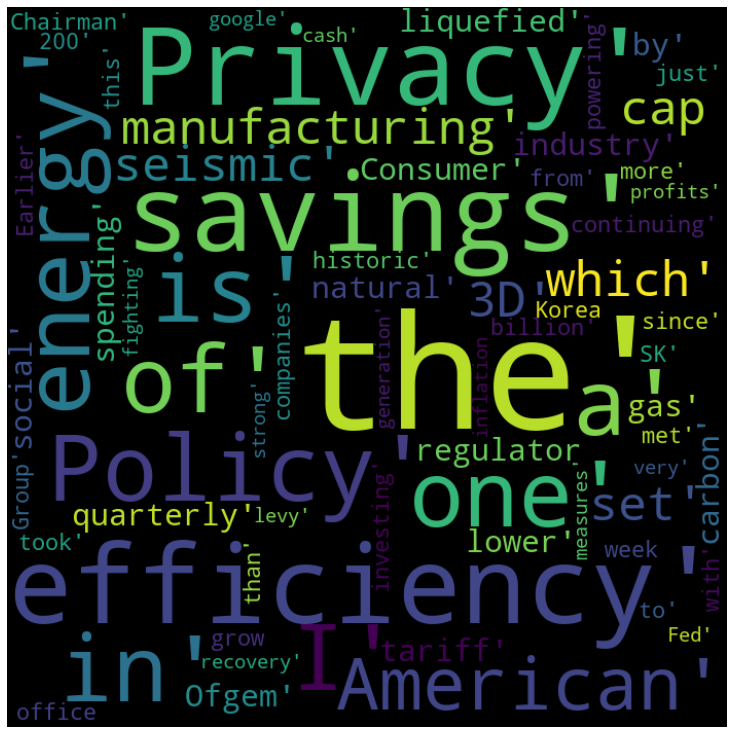

In [35]:
# WordCloud for cleaned data
train.iloc[:] = train.iloc[:].map(lambda x: list(map(str, filter(None, x.split(' '))))) ## Convert the cleaned message from string to list
words = train.iloc[:]
allwords = []
for wordlist in words:
    allwords += wordlist
    
mostcommon = FreqDist(allwords).most_common(10000)
wordcloud = WordCloud(width=700, height=700, background_color=
                      'black').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Answering different questions from predefined options

In [71]:
option = 'b'
info = """Please choose an option below \n
a = what is the cost and monetary value\n
b = what technology was utilized?\n
c = what resources was utilized?\n
"""
while option != 'a' and option != 'b' and option != 'c':
    print(info)
    # option = input(info)

print ("Question "+ "\"" +option+"\"" +" chosen")
print ("Loading-----------------------------------")
if option == "a":
    option = "what is the cost and monetary value"
elif option == "b":
    option = "what technology was used?"
elif option == "c":
    option = "what resources used?"

def qesAns(df,questions = option):
    """question and answer node meant to produce answers to artiles in a dataframe

    Args:
        data: Data containing a text column.
    Returns:
        data: a dataframe answering the asked question based on the articles in each row 
    """
    def qestions(df,column,question):
        result = []
        for i in range(len(train[column])):
            result.append(predictor.predict(passage=train[column][i], question=question)["best_span_str"])
        return result

    train[questions] = qestions(df,column= "text", question = questions)
    return train[questions]
qesAns(train,questions= option)



Question "b" chosen
Loading-----------------------------------


0                                    efficiency savings
1                                            3D seismic
2                                    efficiency savings
3                                        Privacy Policy
4                                        Privacy Policy
5     The cap, which is set quarterly by the energy ...
6                                 liquefied natural gas
7                                    a lower carbon one
8                                         social tariff
9     Consumer spending is continuing to grow. Earli...
10                                  energy profits levy
11                          very strong cash generation
12                          very strong cash generation
13                                   efficiency savings
14                                           3D seismic
15                                   efficiency savings
16                                       Privacy Policy
17                                       Privacy

In [124]:
train = pd.read_csv('shell_merged.csv')


In [125]:
train.shape

(5499, 6)

In [126]:
train = train.drop_duplicates(subset=['text'], keep='last')
train.shape

(3337, 6)

In [132]:
train.dropna(subset=['text'], inplace=True)
train.shape

(3336, 6)

In [128]:
train[train['text'].isna()]

,title,author,url,text,keywords,publish_date
3650,MALABU OIL AND GAS,NaN,https://www.cnbcafrica.com/latest-video/malabu...,NaN,"gas,malabu,oil",NaN


In [137]:
train.drop(train[train.text.str.contains(r'[^0-9a-zA-Z]')].index)

,title,author,url,text,keywords,publish_date


In [138]:
train.shape

(3336, 6)

In [74]:
nlp_models = [
    { 'name' : 'ner-model',
      'url': 'C:/Users/Silas_Dell/Downloads/Compressed/ner-elmo.2021-02-12.tar.gz'
    },
    # { 'name' : 'ner-elmo',
    #   'url' : 'https://storage.googleapis.com/allennlp-public-models/ner-elmo.2021-02-12.tar.gz',
    # },
]

In [75]:
## load models
print ("Loading models...")
for nlp_model in nlp_models:
    print ("Loading model :", nlp_model['name'])
    nlp_model['model'] = Predictor.from_path(nlp_model['url'])


Loading models...
Loading model : ner-model


error loading _jsonnet (this is expected on Windows), treating C:\Users\SILAS_~1\AppData\Local\Temp\tmpbk6r329j\config.json as plain json


In [76]:
train = train.head(70)

## Latest Change done here

In [77]:
# def location (sentence):
#     location = []
#     for nlp_model in nlp_models:
#         results =  nlp_model['model'].predict(sentence=sentence)  # type: ignore
#         for word, tag in zip(results["words"], results["tags"]):
#             if tag != 'U-LOC'and tag != 'B-LOC':
#                 continue
#             else:
#                 # print([word])#(f"{word}")
#                 location.append(word)
#         # print()
#     result = []
#     for i in range(len(train["text"])):
#         result.append(list(set(location(train["text"][i]))))
#         train["location"]=result
#     train['location'] = [', '.join(map(str, l)) for l in train['location']]    
#     return train[["text","location"]]

In [78]:
# location (train)

# Name Entity recognition

In [103]:
def locationOrganization(train):
        train = train.head(1)
        def entity_recognition (sentence):
            location = []
            for nlp_model in nlp_models:
                results =  nlp_model['model'].predict(sentence=sentence)
                for word, tag in zip(results["words"], results["tags"]):
                    if tag != 'U-LOC'and tag != 'B-LOC':
                        continue
                    else:
                        # print([word])#(f"{word}")
                        location.append(word)
                # print()
                return location

        def entity_recognition_pe(sentence):
            organisation = []
            for nlp_model in nlp_models:
                results =  nlp_model['model'].predict(sentence=sentence)
                for word, tag in zip(results["words"], results["tags"]):
                    if tag != 'U-ORG' and tag != 'B-ORG':
                        continue
                    else:
                        # print([word])#(f"{word}")
                        organisation.append(word)
                # print()
                return organisation
        result = []
        for i in range(len(train["text"])):
            result.append(list(set(entity_recognition(train["text"][i]))))
        re1 = []
        for i in range(len(train["text"])):
            re1.append(list(set(entity_recognition_pe(train["text"][i]))))
        train["location"]=result
        train["organisation"]=re1
        train['location'] = [', '.join(map(str, l)) for l in train['location']]
        train['organisation'] = [', '.join(map(str, l)) for l in train['organisation']]
        return train[["text","location","organisation"]]

In [104]:
train = locationOrganization(train)
train

,text,location,organisation
0,"Shell’s long-serving chief executive, Ben van ...","Russia, Europe, UK, Norway, Netherlands, Londo...","Reuters, Business, Shell, BG"


## Latest Change ends here

In [81]:
train.location

0    Russia, Europe, UK, Norway, Netherlands, Londo...
1       Wild, Makhanda, Indian, Algoa, Transkei, South
2    Germany, Russia, Baltic, Europe, Belgium, Slov...
3                                          Britain, UK
4    Barisal, Southwark, Bangladesh, Canada, All, A...
5                           Russia, Ukraine, UK, Great
Name: location, dtype: object

# Visualization

In [113]:
a_list = []
a_list.extend(train['organisation'].tolist())
# a_list.extend(train['country'].tolist())

In [114]:
x = ()
for values in train.organisation.iteritems():
        x += values

passage=str(x)
passage

"(0, 'Reuters, Business, Shell, BG')"

In [115]:
passage1 = passage.replace("'", "")
passage1 = ''.join([i for i in passage1 if not i.isdigit()])
passage1

'(, Reuters, Business, Shell, BG)'

In [109]:
def entity_recognition (sentence):
    miscellaneous = []
    person = []
    organisation = []
    loc = []
    for nlp_model in nlp_models:
        results =  nlp_model['model'].predict(sentence=sentence)
        for word, tag in zip(results["words"], results["tags"]):
            if tag != 'U-LOC':
                continue
            else:
                loc.append(word)
        return loc

In [110]:
coutries = entity_recognition (passage1)


In [111]:
from pandas import DataFrame
df = DataFrame (coutries,columns=['coutries'])
df

,coutries


In [116]:
item_counts = df["coutries"].value_counts()
item_counts

Series([], Name: coutries, dtype: int64)

In [117]:
dfa = DataFrame (item_counts,columns=['coutries',"count"])


In [118]:
dfa.drop(['count'], axis = 1, inplace = True)
dfa


,coutries


In [91]:
#installation
# pip install pycountry-convert
#function to convert to alpah2 country codes and continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

In [92]:
dfa.reset_index(inplace=True)

In [93]:
dfa.rename(columns={'index': 'country','coutries': 'count'},
          inplace=True, errors='raise')


In [94]:
dfa

,country,count
0,Russia,3
1,UK,3
2,Ukraine,3
3,Britain,3
4,Norway,2
5,Europe,2
6,Belgium,1
7,Paris,1
8,Ascot,1
9,All,1


In [95]:
import pycountry_convert as pc
country_continent_name=[]
for country in dfa['country']:
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        name = pc.convert_continent_code_to_continent_name(country_continent_code)
        country_continent_name.append(name)
    except:
        country_continent_name.append("Unknown")
        
#     country_continent_name.append(name)

dfa['region'] = country_continent_name

In [96]:
dfa

,country,count,region
0,Russia,3,Europe
1,UK,3,Unknown
2,Ukraine,3,Europe
3,Britain,3,Unknown
4,Norway,2,Europe
5,Europe,2,Unknown
6,Belgium,1,Europe
7,Paris,1,Unknown
8,Ascot,1,Unknown
9,All,1,Unknown


In [97]:
# generate country code  based on country name 
import pycountry 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
dfa['CODE']=alpha3code(dfa.country)
dfa.head()

,country,count,region,CODE
0,Russia,3,Europe,None
1,UK,3,Unknown,None
2,Ukraine,3,Europe,UKR
3,Britain,3,Unknown,None
4,Norway,2,Europe,NOR


In [101]:
import plotly.express as px

np.random.seed(12)
gapminder = dfa
gapminder['counts'] = np.random.uniform(low=100000, high=200000, size=len(gapminder)).tolist()

fig = px.choropleth(gapminder, locations="CODE",
                    locationmode='ISO-3',
                    color="count", 
                    hover_name="CODE",
                    color_continuous_scale=px.colors.sequential.Blues)

fig.show()

In [102]:
def locvis(df):
    a_list = []
    a_list.extend(df['location'].tolist())
    x = ()
    for values in train.location.iteritems():
            x += values
    passage=str(x)
    passage1 = passage.replace("'", "")
    passage1 = ''.join([i for i in passage1 if not i.isdigit()])
    def entity_recognition (sentence):
        miscellaneous = []
        person = []
        organisation = []
        loc = []
        for nlp_model in nlp_models:
            results =  nlp_model['model'].predict(sentence=sentence)
            for word, tag in zip(results["words"], results["tags"]):
                if tag != 'U-LOC':
                    continue
                else:
                    loc.append(word)
            return loc
    coutries = entity_recognition (passage1)
    from pandas import DataFrame
    df = DataFrame (coutries,columns=['coutries'])
    item_counts = df["coutries"].value_counts()
    dfa = DataFrame (item_counts,columns=['coutries',"count"])
    dfa.drop(['count'], axis = 1, inplace = True)
    from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
    def get_continent(col):
        try:
            cn_a2_code =  country_name_to_country_alpha2(col)
        except:
            cn_a2_code = 'Unknown' 
        try:
            cn_continent = country_alpha2_to_continent_code(cn_a2_code)
        except:
            cn_continent = 'Unknown' 
        return (cn_a2_code, cn_continent)
    dfa.reset_index(inplace=True)
    dfa.rename(columns={'index': 'country','coutries': 'count'},
          inplace=True, errors='raise')
    import pycountry_convert as pc
    country_continent_name=[]
    for country in dfa['country']:
        try:
            country_alpha2 = pc.country_name_to_country_alpha2(country)
            country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
            name = pc.convert_continent_code_to_continent_name(country_continent_code)
            country_continent_name.append(name)
        except:
            country_continent_name.append("Unknown")
            
    #     country_continent_name.append(name)

    dfa['region'] = country_continent_name
    # generate country code  based on country name 
    import pycountry 
    def alpha3code(column):
        CODE=[]
        for country in column:
            try:
                code=pycountry.countries.get(name=country).alpha_3
            # .alpha_3 means 3-letter country code 
            # .alpha_2 means 2-letter country code
                CODE.append(code)
            except:
                CODE.append('None')
        return CODE
    # create a column for code 
    dfa['CODE']=alpha3code(dfa.country)
    dfa.head()
    import plotly.express as px

    np.random.seed(12)
    gapminder = dfa
    gapminder['counts'] = np.random.uniform(low=100000, high=200000, size=len(gapminder)).tolist()

    fig = px.choropleth(gapminder, locations="CODE",
                        locationmode='ISO-3',
                        color="count", 
                        hover_name="CODE",
                        color_continuous_scale=px.colors.sequential.Blues)

    fig.show()

In [105]:
locvis(train)

In [98]:
# first let us merge geopandas data with our data
import geopandas
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(world,dfa,on='CODE')
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name').sort_values(by='count',ascending=False).reset_index()

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
#installation
# pip install geopy
#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent: geopy.geocoders.options.default_user_agent = "my-application")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

SyntaxError: invalid syntax (Temp/ipykernel_23300/2269155042.py, line 5)

In [ ]:
geolocate(dfa.country)

NameError: name 'geolocate' is not defined

In [ ]:
#installation
# pip install folium
# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(df)):
        lat = df.iloc[i]['Latitude']
        long = df.iloc[i]['Longitude']
        radius=5
        popup_text = """Country : {}<br>
                    %of Users : {}<br>"""
        popup_text = popup_text.format(df.iloc[i]['Country'],
                                   df.iloc[i]['User_Percent']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

In [ ]:
# def entity_recognition (sentence):
#     miscellaneous = []
#     person = []
#     organisation = []
#     location = []
#     for nlp_model in nlp_models:
#         results =  nlp_model['model'].predict(sentence=sentence)
#         for word, tag in zip(results["words"], results["tags"]):
#             if tag != 'U-LOC':
#                 continue
#             else:
#                 # print([word])#(f"{word}")
#                 location.append(word)
#         # print()
#         return location


In [ ]:
# def entity_recognition_per (sentence):
#     miscellaneous = []
#     person = []
#     organisation = []
#     location = []
#     for nlp_model in nlp_models:
#         results =  nlp_model['model'].predict(sentence=sentence)
#         for word, tag in zip(results["words"], results["tags"]):
#             if tag != 'U-ORG':
#                 continue
#             else:
#                 # print([word])#(f"{word}")
#                 organisation.append(word)
#         # print()
#         return organisation

In [ ]:
# sentences = '''Ben van Beurden, who took over in 2014, would leave Shell in the middle of the most severe energy crisis of his tenure. his departure would end a near-40-year career at the oil and gas giant in England and Ghana.'''

In [ ]:
# entity_recognition_per(sentences)

In [ ]:
# result = []
# for i in range(len(train["text"])):
#     result.append(entity_recognition_per(train["text"][i]))

In [ ]:
# train["org"]=result
# train

In [ ]:
train.to_csv("test.csv")